### **Part-4 : Training the Model**
---

### **The target variable we're using is the pIC50**

#### **Get the input and output features (X and Y respectively)**

In [1]:
import os
import pandas as pd

df = pd.read_csv (os.path.join ("Datasets", "Part-3_Bioactivity_Three_PubChem_PIC50.csv"))
X = df.drop (columns = ['PIC50'])
Y = df.PIC50

print (X.head (3))
print (Y.head (3))

print (X.shape)
print (Y.shape)

   PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0           1           1           1           0           0           0   
1           1           1           1           0           0           0   
2           1           1           0           0           0           0   

   PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0           0           0           0           1  ...             0   
1           0           0           0           1  ...             0   
2           0           0           0           1  ...             0   

   PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   

   PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0             0             0            

#### **Remove Low-Variance Features**
---
##### Variance Threshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

##### If y is changing, then x should be irrelevant in the relationship because it is constant. This is the reason, why people tend to discard variables with low variance.

In [2]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold (threshold = (0.8 * (1 - 0.8)))
X = selection.fit_transform (X)

In [3]:
X.shape

(4928, 134)

#### **Split The Data into Train and Test set**

In [4]:
import numpy as np
np.random.seed (100)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.21, random_state = 42)

In [18]:
print (X_test.shape)
print (Y_test.shape)
print (X_train.shape)
print (Y_train.shape)

(1035, 134)
(1035,)
(3893, 134)
(3893,)


### **Building a Model using Random Forest**
---

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor (n_estimators = 100)
model.fit (X_train, Y_train)
r2 = model.score (X_test, Y_test)
r2

0.41830492183025614

### **Training Lazy Predict**
---

In [20]:
import pandas as pd
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf = lazypredict.Supervised.LazyRegressor (verbose = 0, ignore_warnings = True, custom_metric = None)
train, test = clf.fit (X_train, X_test, Y_train, Y_test)

100%|███████████████████████████████████████████████████████████████████████████████████| 42/42 [01:04<00:00,  1.55s/it]


In [21]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.38,0.46,1.31,4.38
LGBMRegressor,0.38,0.46,1.31,0.23
RandomForestRegressor,0.33,0.42,1.35,4.54
SVR,0.33,0.41,1.36,4.45
NuSVR,0.32,0.41,1.36,3.13
XGBRegressor,0.29,0.38,1.39,0.71
KNeighborsRegressor,0.29,0.38,1.39,0.97
BaggingRegressor,0.28,0.38,1.40,0.39
GradientBoostingRegressor,0.27,0.37,1.41,2.47


In [22]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.38,0.46,1.31,4.38
LGBMRegressor,0.38,0.46,1.31,0.23
RandomForestRegressor,0.33,0.42,1.35,4.54
SVR,0.33,0.41,1.36,4.45
NuSVR,0.32,0.41,1.36,3.13
XGBRegressor,0.29,0.38,1.39,0.71
KNeighborsRegressor,0.29,0.38,1.39,0.97
BaggingRegressor,0.28,0.38,1.40,0.39
GradientBoostingRegressor,0.27,0.37,1.41,2.47


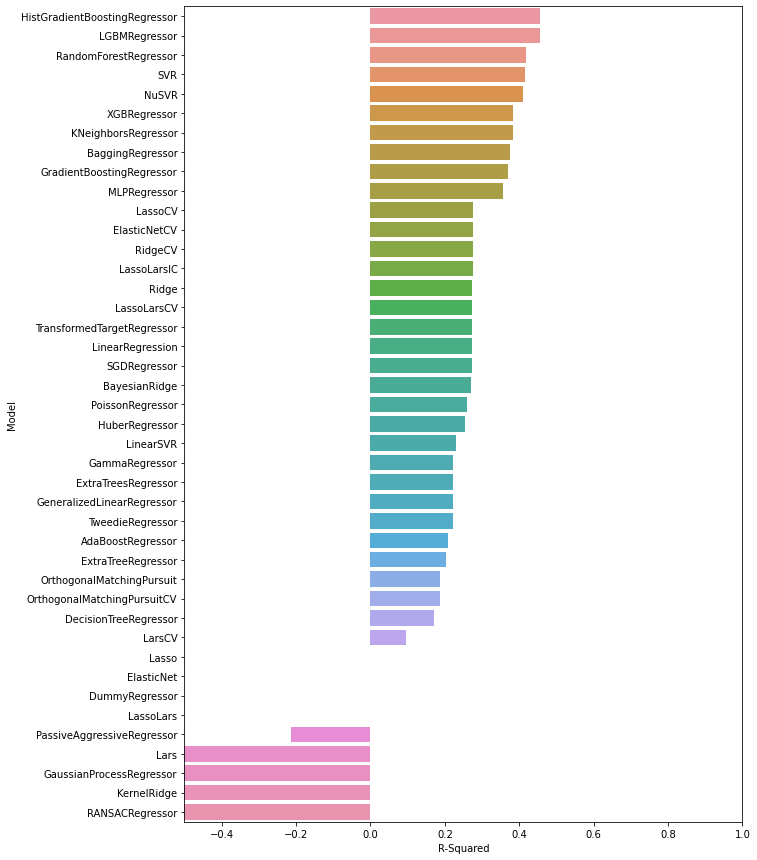

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure (figsize = (10, 15))
ax = sns.barplot (y = train.index, x = "R-Squared", data = train)
ax.set (xlim = (-0.5, 1))

import os
plt.savefig (os.path.join ("Observations", "Part-4_Lazy_Regressor.pdf"))